### Imports

In [43]:
import importlib
from AIBind.import_modules import *
from AIBind import AIBind

In [44]:
importlib.reload(AIBind)

<module 'AIBind.AIBind' from '/home/sars-busters-consolidated/GitCode/AIBind/AIBind.py'>

### GPU Settings

In [4]:
str(subprocess.check_output('nvidia-smi', shell = True)).split('\\n')

["b'Tue Jun 22 14:47:07 2021       ",
 '+-----------------------------------------------------------------------------+',
 '| NVIDIA-SMI 418.87.01    Driver Version: 418.87.01    CUDA Version: 10.1     |',
 '|-------------------------------+----------------------+----------------------+',
 '| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |',
 '| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |',
 '|===============================+======================+======================|',
 '|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |',
 '| N/A   67C    P0    30W /  70W |  14387MiB / 15079MiB |      0%      Default |',
 '+-------------------------------+----------------------+----------------------+',
 '|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |',
 '| N/A   77C    P0    35W /  70W |    193MiB / 15079MiB |      0%      Default |',
 '+-------------------------------+---

In [5]:
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

### VAENet

#### Read In Test Datasets

In [72]:
targets_test = []
targets_validation = []
edges_test = []
edges_validation = []
train_sets = []

for run_number in tqdm(range(5)):
    
    targets_test.append(pd.read_csv('/data/sars-busters-consolidated/GitData/VecNet_Unseen_Nodes/test_unseen_nodes_' + str(run_number) + '.csv'))
    edges_test.append(pd.read_csv('/data/sars-busters-consolidated/GitData/VecNet_Unseen_Nodes/test_unseen_edges_' + str(run_number) + '.csv'))    
    targets_validation.append(pd.read_csv('/data/sars-busters-consolidated/GitData/VecNet_Unseen_Nodes/validation_unseen_nodes_' + str(run_number) + '.csv'))    
    edges_validation.append(pd.read_csv('/data/sars-busters-consolidated/GitData/VecNet_Unseen_Nodes/validation_unseen_edges_' + str(run_number) + '.csv'))    
    train_sets.append(pd.read_csv('/data/sars-busters-consolidated/GitData/VecNet_Unseen_Nodes/train_' + str(run_number) + '.csv'))    

  0%|          | 0/5 [00:00<?, ?it/s]

#### AIBind Object

In [73]:
with open('/data/sars-busters-consolidated/chemicals/vae_chemicals.csv', 'rb') as file: 
    drugs = pkl.load(file)

with open('/data/sars-busters/Mol2Vec/amino_01_w_embed.pkl','rb') as file: 
    targets = pkl.load(file)
    
targets = targets.rename(columns = {'Label' : 'target_aa_code'})

In [74]:
targets_to_add = list(set(pd.concat(targets_test)['target_aa_code']).difference(targets['target_aa_code']))
targets_to_add = pd.DataFrame(targets_to_add)
targets_to_add.columns = ['target_aa_code']

targets_to_add = vaenet_object.get_protvec_embeddings(prediction_interactions = targets_to_add,
                                                      embedding_dimension = 100,
                                                      replace_dataframe = False,
                                                      return_normalisation_conststants = False,
                                                      delimiter = '\t')

targets = targets[['target_aa_code', 'normalized_embeddings']]
targets = pd.concat([targets, targets_to_add])

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [75]:
# Create object
vaenet_object = AIBind.AIBind(interactions_location = '/data/sars-busters-consolidated/GitData/interactions/Network_Derived_Negatives.csv',
                              interactions = None,
                              interaction_y_name = 'Y',

                              absolute_negatives_location = None,
                              absolute_negatives = None,

                              drugs_location = None,
                              drugs_dataframe = drugs,
                              drug_inchi_name = 'InChiKey',
                              drug_smile_name = 'SMILE',

                              targets_location = None,
                              targets_dataframe = targets, 
                              target_seq_name = 'target_aa_code',

                              mol2vec_location = None,
                              mol2vec_model = None,

                              protvec_location = '/home/sars-busters/Mol2Vec/Results/protVec_100d_3grams.csv', 
                              protvec_model = None,

                              nodes_test = targets_test, 
                              nodes_validation = targets_validation, 

                              edges_test = edges_test, 
                              edges_validation = edges_validation, 

                              model_out_dir = '/data/sars-busters-consolidated/vaenet/KF-Final/',

                              debug = False)

#### Update Drugs and Targets 

In [76]:
vaenet_object.get_external_drug_embeddings(pred_drug_embeddings = None,
                                           normalized = False,
                                           replace_dataframe = True,
                                           return_normalisation_conststants = False)

In [77]:
vaenet_object.get_external_target_embeddings(pred_target_embeddings = None,
                                             normalized = False,
                                             replace_dataframe = True,
                                             return_normalisation_conststants = False)

#### Create Train Sets

In [78]:
vaenet_object.create_train_sets(unseen_nodes_flag = True,
                                data_leak_check = True)

  0%|          | 0/5 [00:00<?, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Set :  0
Train - Test - Validation Overlap For Unseen Targets :  0
Train - Test - Validation Overlap For Unseen Drugs :  0
Train - Test - Validation Overlap For Unseen Edges :  0
Train Set :  (12770, 3)
Nodes Test :  (6491, 3)
Nodes Val :  (6492, 3)
Edge Test :  (3693, 3)
Edge Val :  (3693, 3)
Positive / Negatative Ratio :  0.37341363734136374

Set :  1
Train - Test - Validation Overlap For Unseen Targets :  0
Train - Test - Validation Overlap For Unseen Drugs :  0
Train - Test - Validation Overlap For Unseen Edges :  0
Train Set :  (12166, 3)
Nodes Test :  (6935, 3)
Nodes Val :  (6790, 3)
Edge Test :  (3603, 3)
Edge Val :  (3603, 3)
Positive / Negatative Ratio :  0.3620689655172414

Set :  2
Train - Test - Validation Overlap For Unseen Targets :  0
Train - Test - Validation Overlap For Unseen Drugs :  0
Train - Test - Validation Overlap For Unseen Edges :  0
Train Set :  (15660, 3)
Nodes Test :  (6329, 3)
Nodes Val :  (6184, 3)
Edge Test :  (3785, 3)
Edge Val :  (3785, 3)
Positive / N

#### Train

In [79]:
vaenet_object.train_vecnet(model_name = 'vaenet_5_fold',
                           epochs = 30,
                           version = 0,
                           learning_rate = 0.00001,
                           beta_1 = 0.9,
                           beta_2 = 0.999,
                           batch_size = 16,
                           chunk_test_frequency = 250)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

Unseen Nodes AUC : 0.42
Unseen Edges AUC : 0.43
Unseen Nodes AUP : 0.43
Unseen Edges AUP : 0.48

Unseen Nodes AUC : 0.69
Unseen Edges AUC : 0.66
Unseen Nodes AUP : 0.67
Unseen Edges AUP : 0.65

Unseen Nodes AUC : 0.72
Unseen Edges AUC : 0.69
Unseen Nodes AUP : 0.69
Unseen Edges AUP : 0.67

Unseen Nodes AUC : 0.73
Unseen Edges AUC : 0.7
Unseen Nodes AUP : 0.69
Unseen Edges AUP : 0.69

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.71
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.7

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.74
Unseen Edges A

  0%|          | 0/30 [00:00<?, ?it/s]

Unseen Nodes AUC : 0.41
Unseen Edges AUC : 0.41
Unseen Nodes AUP : 0.45
Unseen Edges AUP : 0.46

Unseen Nodes AUC : 0.66
Unseen Edges AUC : 0.66
Unseen Nodes AUP : 0.65
Unseen Edges AUP : 0.64

Unseen Nodes AUC : 0.69
Unseen Edges AUC : 0.69
Unseen Nodes AUP : 0.67
Unseen Edges AUP : 0.67

Unseen Nodes AUC : 0.7
Unseen Edges AUC : 0.71
Unseen Nodes AUP : 0.68
Unseen Edges AUP : 0.68

Unseen Nodes AUC : 0.71
Unseen Edges AUC : 0.71
Unseen Nodes AUP : 0.68
Unseen Edges AUP : 0.68

Unseen Nodes AUC : 0.72
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.69
Unseen Edges AUP : 0.69

Unseen Nodes AUC : 0.73
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.69

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.71
Unseen Edges AUP : 0.7

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.71
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.75
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.75
Unseen Ed

  0%|          | 0/30 [00:00<?, ?it/s]

Unseen Nodes AUC : 0.37
Unseen Edges AUC : 0.36
Unseen Nodes AUP : 0.38
Unseen Edges AUP : 0.43

Unseen Nodes AUC : 0.69
Unseen Edges AUC : 0.69
Unseen Nodes AUP : 0.64
Unseen Edges AUP : 0.68

Unseen Nodes AUC : 0.72
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.67
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.69
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.75
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.76
Unseen Edges AUC : 0.75
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.74

Unseen Nodes AUC : 0.77
Unseen Edges AUC : 0.76
Unseen Nodes AUP : 0.73
Unseen Edges AUP : 0.75

Unseen Nodes AUC : 0.77
Unseen Edges AUC : 0.76
Unseen Nodes AUP : 0.73
Unseen Edges AUP : 0.75

Unseen Nodes AUC : 0.77
Unseen Edges AUC : 0.77
Unseen Nodes AUP : 0.74
Unseen Edges AUP : 0.76

Unseen Nodes AUC : 0.78
Unseen Edges AUC : 0.77
Unseen Nodes AUP : 0.74
Unseen Edges AUP : 0.77

Unseen Nodes AUC : 0.78
Unseen 

  0%|          | 0/30 [00:00<?, ?it/s]

Unseen Nodes AUC : 0.38
Unseen Edges AUC : 0.38
Unseen Nodes AUP : 0.42
Unseen Edges AUP : 0.44

Unseen Nodes AUC : 0.65
Unseen Edges AUC : 0.68
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.68

Unseen Nodes AUC : 0.66
Unseen Edges AUC : 0.71
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.7

Unseen Nodes AUC : 0.66
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.74

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.75
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.74

Unseen Nodes AUC : 0.67
Unseen Edges AUC : 0.75
Unseen Nodes AUP : 0.59
Unseen Edges AUP : 0.74

Unseen Nodes AUC : 0.68
Unseen 

  0%|          | 0/30 [00:00<?, ?it/s]

Unseen Nodes AUC : 0.37
Unseen Edges AUC : 0.39
Unseen Nodes AUP : 0.42
Unseen Edges AUP : 0.45

Unseen Nodes AUC : 0.7
Unseen Edges AUC : 0.68
Unseen Nodes AUP : 0.68
Unseen Edges AUP : 0.68

Unseen Nodes AUC : 0.72
Unseen Edges AUC : 0.71
Unseen Nodes AUP : 0.69
Unseen Edges AUP : 0.7

Unseen Nodes AUC : 0.73
Unseen Edges AUC : 0.72
Unseen Nodes AUP : 0.7
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.74
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.71
Unseen Edges AUP : 0.71

Unseen Nodes AUC : 0.75
Unseen Edges AUC : 0.73
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.75
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.72

Unseen Nodes AUC : 0.75
Unseen Edges AUC : 0.74
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.76
Unseen Edges AUC : 0.75
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.73

Unseen Nodes AUC : 0.76
Unseen Edges AUC : 0.75
Unseen Nodes AUP : 0.72
Unseen Edges AUP : 0.74

Unseen Nodes AUC : 0.76
Unseen Ed

#### Validation 

In [80]:
vaenet_object.get_validation_results(model_name = None,
                   show_plots = False,
                   plot_title = 'Validation Results - 5 Fold Cross Validation',
                   num_cols = 2,
                   plot_height = 1500,
                   plot_width = 1500,
                   write_plot_to_html = False,
                   plot_dir = None,
                   plot_name = None)

(Epoch * Chunk) With Highest Unseen Node and Edge Score :  28
(Epoch * Chunk) With Highest Unseen Node Score :  24
(Epoch * Chunk) With Highest Unseen Edge Score :  28
Validation Performance
Best Model Suffix :  _epoch_28_idx_0.model
Unseen Node AUC :  0.7441326005155134 +/- 0.03124631295376864
Unseen Node AUP :  0.7139282867020109 +/- 0.043659417447834865
Unseen Edges AUC :  0.7812002636453055 +/- 0.009894215851938618
Unseen Edges AUP :  0.7979654688561665 +/- 0.009661033642327243


#### Test Results

Testing on model :  vaenet_5_fold_v00_run0_06-23_08h18_epoch_28_idx_0.model
Testing on model :  vaenet_5_fold_v00_run1_06-23_08h24_epoch_28_idx_0.model
Testing on model :  vaenet_5_fold_v00_run2_06-23_08h29_epoch_28_idx_0.model
Testing on model :  vaenet_5_fold_v00_run3_06-23_08h37_epoch_28_idx_0.model
Testing on model :  vaenet_5_fold_v00_run4_06-23_08h42_epoch_28_idx_0.model


,Unseen Nodes / Targets,Unseen Edges
AUC,0.74 +/- 0.034,0.777 +/- 0.01
AUP,0.701 +/- 0.048,0.79 +/- 0.011
F1 Score,0.692 +/- 0.014,0.719 +/- 0.009
F1 Threshold,0.088 +/- 0.015,0.088 +/- 0.019


Confusion Matrix - Unseen Nodes / Targets : 


,Pred (0),Pred (1)
True (0),0.75 +/- 0.03,0.37 +/- 0.03
True (1),0.25 +/- 0.03,0.63 +/- 0.03


Confusion Matrix - Unseen Edges : 


,Pred (0),Pred (1)
True (0),0.74 +/- 0.02,0.34 +/- 0.03
True (1),0.26 +/- 0.02,0.66 +/- 0.03


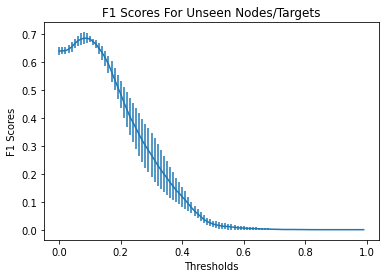

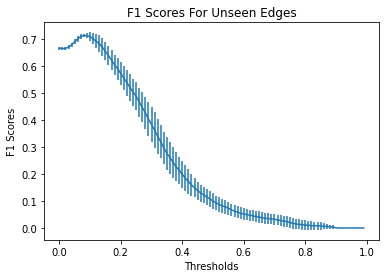

In [81]:
vaenet_object.get_test_results(model_name = None,
                               version_number = None,
                               optimal_validation_model = None,
                               drug_filter_list = [],
                               target_filter_list = [])

#### Prediction 

In [50]:
sars_targets = pd.read_csv('/data/External Predictions/SARS Sequences/20201203_Targets_Sequences_SARS_Cov2.csv')

sars_d_list = []
sars_t_list = []

for d in list(drugs['InChiKey'])[:500]:
    
    sars_d_list = sars_d_list + ([d] * len(list(sars_targets['Sequence'])))
    sars_t_list = sars_t_list + list(sars_targets['Sequence'])
    
predict_df = pd.DataFrame(list(zip(sars_d_list, sars_t_list)))
predict_df.columns = ['InChiKey', 'target_aa_code']
predict_df = predict_df.drop_duplicates(keep = False)
predict_df

,InChiKey,target_aa_code
0,XLYOFNOQVPJJNP-UHFFFAOYSA-N,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...
1,XLYOFNOQVPJJNP-UHFFFAOYSA-N,MGSGSSSYRPKAIYLDIDGRIQKVIFSKYCNSSDIMDLFCIATGLP...
2,XLYOFNOQVPJJNP-UHFFFAOYSA-N,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...
3,XLYOFNOQVPJJNP-UHFFFAOYSA-N,MAAQRRSLLQSEQQPSWTDDLPLCHLSGVGSASNRSYSADGKGTES...
4,XLYOFNOQVPJJNP-UHFFFAOYSA-N,MARGSALPRRPLLCIPAVWAAAALLLSVSRTSGEVEVLDPNDPLGP...
...,...,...
16495,QZNPNKJXABGCRC-LFRDXLMFSA-N,MANFQEHLSCSSSPHLPFSESKTFNGLQDELTAMGNHPSPKLLEDQ...
16496,QZNPNKJXABGCRC-LFRDXLMFSA-N,MDSSAVITQISKEEARGPLRGKGDQKSAASQKPRSRGILHSLFCCV...
16497,QZNPNKJXABGCRC-LFRDXLMFSA-N,MGQQVGRVGEAPGLQQPQPRGIRGSSAARPSGRRRDPAGRTTETGF...
16498,QZNPNKJXABGCRC-LFRDXLMFSA-N,MGTVLSLSPSYRKATLFEDGAATVGHYTAVQNSKNAKDKNLKRHSI...


In [37]:
vaenet_object.protvec_location = '/home/sars-busters/Mol2Vec/Results/protVec_100d_3grams.csv'

sars_embeddings = vaenet_object.get_protvec_embeddings(prediction_interactions = predict_df,
                                                       embedding_dimension = 100,
                                                       replace_dataframe = False,
                                                       return_normalisation_conststants = False,
                                                       delimiter = '\t')

0it [00:00, ?it/s]

0it [00:00, ?it/s]

In [51]:
sars_embeddings

,target_aa_code,normalized_embeddings
0,MPAAAGDGLLGEPAAPGGGGGAEDAARPAAACEGSFLPAWVSGVPR...,"[-18.630093000000002, -2.896413, -3.0235929999..."
1,MGSGSSSYRPKAIYLDIDGRIQKVIFSKYCNSSDIMDLFCIATGLP...,"[-12.565796999999996, -2.817929999999998, -1.3..."
2,MPTTIEREFEELDTQRRWQPLYLEIRNESHDYPHRVAKFPENRNRN...,"[-8.348188, -3.7263290000000002, -1.7557660000..."
3,MAAQRRSLLQSEQQPSWTDDLPLCHLSGVGSASNRSYSADGKGTES...,"[-12.543451000000006, -4.744106, -0.1855949999..."
4,MARGSALPRRPLLCIPAVWAAAALLLSVSRTSGEVEVLDPNDPLGP...,"[-22.265352, -4.667877, -7.002666000000003, -2..."
5,MEAPLRPAADILRRNPQQDYELVQRVGSGTYGDVYKARNVHTGELA...,"[-19.799501999999997, -2.3652699999999993, -0...."
6,MEPPRGPPANGAEPSRAVGTVKVYLPNKQRTVVTVRDGMSVYDSLD...,"[-11.395638999999996, -1.5503529999999994, -5...."
7,MNFNTILEEILIKRSQQKKKTSPLNYKERLFVLTKSMLTYYEGRAE...,"[-11.858782999999999, 0.575775, -2.40721400000..."
8,MSEVPVARVWLVLLLLTVQVGVTAGAPWQCAPCSAEKLALCPPVSA...,"[-4.9076900000000006, -1.9370750000000003, -2...."
9,MEPSRALLGCLASAAAAAPPGEDGAGAGAEEEEEEEEEAAAAVGPG...,"[-26.994364999999995, -9.187720999999994, -3.6..."


In [53]:
vaenet_object.get_fold_averaged_prediction_results(model_name = None,
                                                   version_number = None,
                                                   model_paths = [],
                                                   optimal_validation_model = None,
                                                   test_sets = [predict_df],
                                                   get_drug_embed = False,
                                                   pred_drug_embeddings = None,
                                                   drug_embed_normalized = False,
                                                   get_target_embed = True,
                                                   pred_target_embeddings = sars_embeddings,
                                                   target_embed_normalized = False,
                                                   drug_filter_list = [],
                                                   target_filter_list = [],
                                                   return_dataframes = False)


Testing on model :  /data/sars-busters-consolidated/test_remove_if_needed/Run_0/vaenet_ds2_5_fold_2x_v00_run0_06-18_17h58_epoch_0_idx_0.model
filtered_nodes_test :  (16500, 2)
Drugs :  500
Targets :  33
pred_drugs_dataframe :  (629, 2)
X0, X1 :  (16500, 100) (16500, 200)
unseen_targets_pred :  (16500,)
list :  16500
